In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [2]:
df_TOCC = pd.read_csv('../../datasets/TypeOfContractChannel.csv')
df_TOCC[:2]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


### 범주형 - 연속형 : 범주형 따른 상관관계 확인

#### 선정 변수 : channel(항목 2), Mileage\[:500\](정규분포)
    -> insight가 될만한 항목이 무엇인가?
    - 기본적으로 평균으로 검증하는것임. 
- 분석 내용 : channel 중 서비스방문과 홈쇼핑에 따른 마일리지가 평균 차이가 있는가 ?
    - 귀무가설 : 평균에 차이 없다.
    - 대립가설 : 평균에 차이 있다.
- 분석 결론 (기준 : p-value 0.05)
    ⇒ 등분산인거 확인했고 x범주가 2개여서 T-test 진행
    stats.ttest_ind(df_service['Mileage'], df_homeshopping['Mileage'], equal_var=True)
    Ttest_indResult(statistic=-0.08025301134894845, pvalue=0.9360455086241137)
    - 통계 결론 : p-value 0.936으로 귀무 가설 참. 
    - 사실 결론 : 평균에 차이 없다. 

In [89]:
## 검증 대상 항목만 필터링 and 100개만 추출(정규분포 자료 획득)
condition = (df_TOCC['channel'] == '서비스 방문') | (df_TOCC['channel'] == '홈쇼핑/방송')
df_channel_Mileage = df_TOCC[condition][['channel','Mileage']][:100]
df_channel_Mileage[:2]

,channel,Mileage
0,서비스 방문,1862.0
1,서비스 방문,2532.0


In [90]:
df_channel_Mileage['channel'].value_counts()

서비스 방문    62
홈쇼핑/방송    38
Name: channel, dtype: int64

In [91]:
df_channel_Mileage.isnull().sum()

channel     0
Mileage    14
dtype: int64

In [92]:
df_channel_Mileage = df_channel_Mileage.dropna()

In [93]:
df_channel_Mileage.isnull().sum()

channel    0
Mileage    0
dtype: int64

##### 정규성 검증
    - row 5000 기준
            - 5000개 이하: shapiro
            - 5000개 이상: anderson

In [94]:
stats.shapiro(df_channel_Mileage['Mileage'])

ShapiroResult(statistic=0.9774371981620789, pvalue=0.1371416300535202)

→ p-value가 pvalue=0.1371416300535202으로 정규분포야. 

<Axes: xlabel='Mileage', ylabel='Count'>

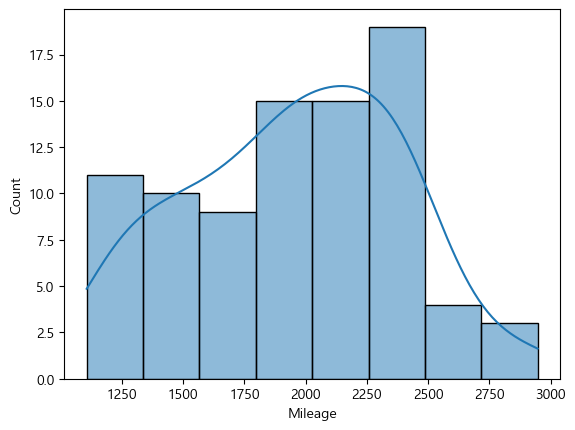

In [95]:
sns.histplot(data=df_channel_Mileage, x='Mileage', kde=True)

##### 등분산 검증
    - 두 범주에 대한 범주를 비교하기 위함.
    - channel column에서 '서비스 방문', '홈쇼핑/방송' 분산 비교하기 위함. 
        ⇒ 각각 항목을 분리해서 DataFrame으로 정의하고 이를 countplot으로 한번 확인
    - 검증방법: seaborn의 scipy에서 levene를 사용한ㄷㅏ. _이 검증할때는 비교하기 위해 y=연속형 넣고 검증한다. 
    

###### 등분산 검증_판별
    - 귀무가설: 분산은 일치한다. 
    - 대립가설: 분산이 일치하지 않는다. 
    → 결과_sns.levene(df_[y:연속형])
        - p-value:0.7445 로 귀무가설이 참이다.

In [10]:
df_service = df_channel_Mileage[df_channel_Mileage['channel'] == '서비스 방문']
df_service[:2]

,channel,Mileage
0,서비스 방문,1862.0
1,서비스 방문,2532.0


In [11]:
df_homeshopping = df_channel_Mileage[df_channel_Mileage['channel'] == '홈쇼핑/방송']
df_homeshopping[:2]

,channel,Mileage
2,홈쇼핑/방송,2363.0
6,홈쇼핑/방송,2348.0


<Axes: xlabel='channel', ylabel='count'>

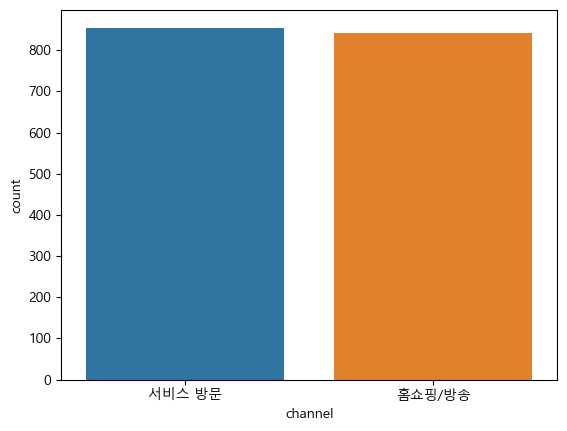

In [12]:
sns.countplot(data=df_channel_Mileage, x='channel')

In [13]:
stats.levene(df_service['Mileage'], df_homeshopping['Mileage'])

LeveneResult(statistic=0.10621828323889944, pvalue=0.7445315946688518)

<Axes: xlabel='Mileage', ylabel='Count'>

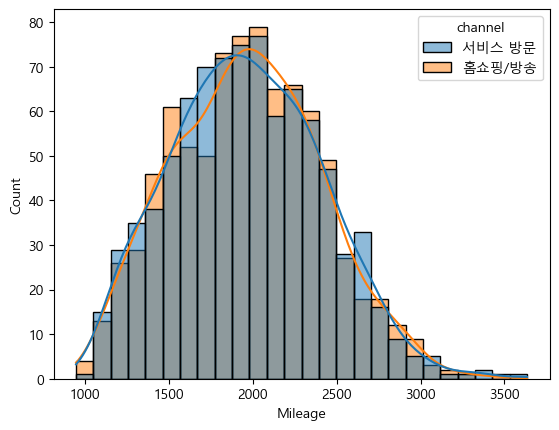

In [14]:
sns.histplot(data=df_channel_Mileage, x='Mileage', kde=True, hue='channel')

In [15]:
## 등분산인거 확인했고 x범주가 2개여서 T-test 진행
stats.ttest_ind(df_service['Mileage'], df_homeshopping['Mileage'], equal_var=True)

Ttest_indResult(statistic=-0.08025301134894845, pvalue=0.9360455086241137)

### y_정규분포, x_3집단 이상 비교

#### 선정 변수 : channel(항목 3), 
    -> insight가 될만한 항목이 무엇인가?
    - 기본적으로 평균으로 검증하는것임. 
- 분석 내용 : 홈쇼핑/방송', '렌탈총판','R인터넷' 따른 마일리지가 평균 차이가 있는가 ?
    - 귀무가설 : 3개 채널 사이에 마일리지의 변화 없음
    - 대립가설 : 3개 채널 사이에 마일리지의 변화 있음
- 분석 결론 (기준 : p-value 0.05)
    ⇒ F_onewayResult(statistic=1.6471871558727058, pvalue=0.19821931226360748)
    - 통계 결론 : p-value가 0.1982로 귀무가설 참. 
    - 사실 결론 : 3개 채널 사이에 마일리지의 변화 없음. 

<Axes: xlabel='Mileage', ylabel='Count'>

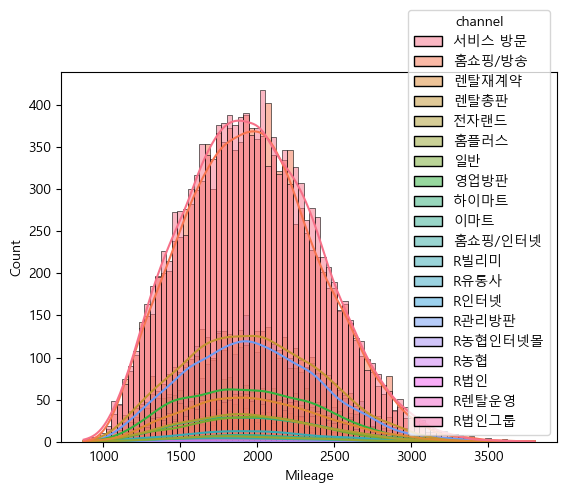

In [16]:
sns.histplot(data = df_TOCC, x= 'Mileage', kde=True, hue='channel')

In [24]:
df_TOCC['channel'].value_counts().index

Index(['서비스 방문', '홈쇼핑/방송', '렌탈총판', 'R관리방판', '하이마트', '영업방판', '렌탈재계약', '일반',
       '전자랜드', 'R빌리미', '이마트', '홈플러스', 'R인터넷', 'R유통사', '홈쇼핑/인터넷', 'R렌탈운영',
       'R농협', 'R농협인터넷몰', 'R법인그룹', 'R법인'],
      dtype='object')

In [75]:
conditions = (df_TOCC['channel'] == 'R인터넷')|(df_TOCC['channel'] == '홈쇼핑/방송')|(df_TOCC['channel'] == '렌탈총판')
df_channel3_Mileage = df_TOCC[conditions][['channel', 'Mileage']][:100] # 필터 추출 slicing 동시
df_channel3_Mileage

,channel,Mileage
2,홈쇼핑/방송,2363.0
6,홈쇼핑/방송,2348.0
7,홈쇼핑/방송,NaN
10,홈쇼핑/방송,1555.0
11,홈쇼핑/방송,1503.0
...,...,...
296,홈쇼핑/방송,1671.0
298,홈쇼핑/방송,1839.0
299,홈쇼핑/방송,2218.0
306,홈쇼핑/방송,1863.0


In [57]:
df_channel3_Mileage.isnull().sum()

channel    0
Mileage    5
dtype: int64

In [58]:
df_channel3_Mileage =df_channel3_Mileage.dropna()

In [59]:
df_channel3_Mileage.isnull().sum()

channel    0
Mileage    0
dtype: int64

##### 정규성 검증
    - 5000개 이상: anderson

In [60]:
len(df_channel3_Mileage)

95

In [63]:
stats.shapiro(df_channel3_Mileage['Mileage']) ## p-value가 0.04이긴 한데 .. 일단 정규로 가정하고 진행

ShapiroResult(statistic=0.972218930721283, pvalue=0.04076038673520088)

<Axes: xlabel='Mileage', ylabel='Count'>

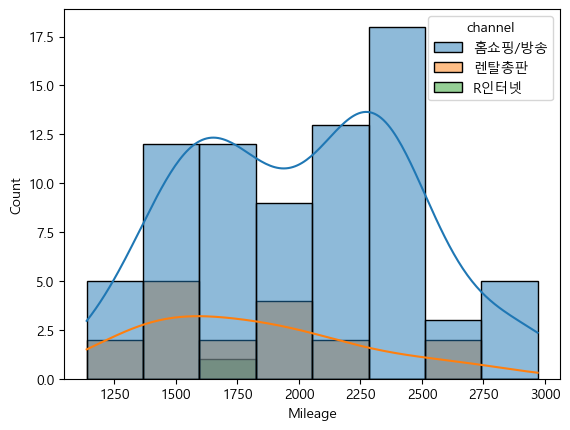

In [64]:
sns.histplot(data=df_channel3_Mileage, x='Mileage', kde=True, hue='channel')

##### 등분산 여부 검증
    - x의 각 항목들은 등분산이다. (현재 가정임)

In [65]:
#type(df_channel4_amount['channel'].value_counts())
df_channel_list =df_channel3_Mileage['channel'].value_counts().index.to_list()
df_channel_list

['홈쇼핑/방송', '렌탈총판', 'R인터넷']

In [68]:
df_result = [] # list()
for item in df_channel_list : 
    condition = (df_channel3_Mileage['channel'] == item)
    df_result.append(df_channel3_Mileage[condition]) ## list_index에 value가 쌓일때 DataFrame 형식으로 쌓이는거 같음
    ### 검증이 일어나는 변수는 4개. 각각 변수를 담는다. 

In [70]:
len(df_result)

3

In [73]:
## 등분산 여부 검증
stats.levene(df_result[0]['Mileage'],df_result[1]['Mileage'],df_result[2]['Mileage'], )

LeveneResult(statistic=1.3990694558452188, pvalue=0.25202796808711486)

###### ANOVA test
-각 항목별 목표변수와 검증
    - f_oneway : 등분산이고 3개 이상 비교 
    

In [74]:
stats.f_oneway(df_result[0]['Mileage'],df_result[1]['Mileage'],df_result[2]['Mileage'],)

F_onewayResult(statistic=1.6471871558727058, pvalue=0.19821931226360748)